In this code, you will investigate simple and multiple linear regression models using the asthma dataset available at http://stats191.stanford.edu/data/asthma.table. The dataset comprises three features: 

1.   $Y$: Number of admittances (counts) to an emergency room for asthma-related problems on a given day.
2.   $T$: Daily high temperature.
3. $P$: Level of some atmoshpheric pollutant.


In [1]:
library(ggplot2) # powerful visualization library
library(dplyr) # powerful data wrangling library


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# Load asthma data which contains the number of admittances (counts) Y to an emergency
# room for asthma-related problems in a hospital for several days. On each day,
# researchers also recorded the daily high temperature T, and the level of some
# atmospheric pollutant P
file = 'http://stats191.stanford.edu/data/asthma.table'
asthmaData = read.table(file, header = TRUE, stringsAsFactors = FALSE)
str(asthmaData)
head(asthmaData)

'data.frame':	30 obs. of  3 variables:
 $ T: int  56 57 58 60 61 62 65 66 68 67 ...
 $ P: int  38 39 72 43 39 44 48 60 63 57 ...
 $ Y: int  3 2 2 1 1 4 0 2 4 1 ...


,T,P,Y
,<int>,<int>,<int>
1,56,38,3
2,57,39,2
3,58,72,2
4,60,43,1
5,61,39,1
6,62,44,4


[1] 0.2640937

[1] 0.436828

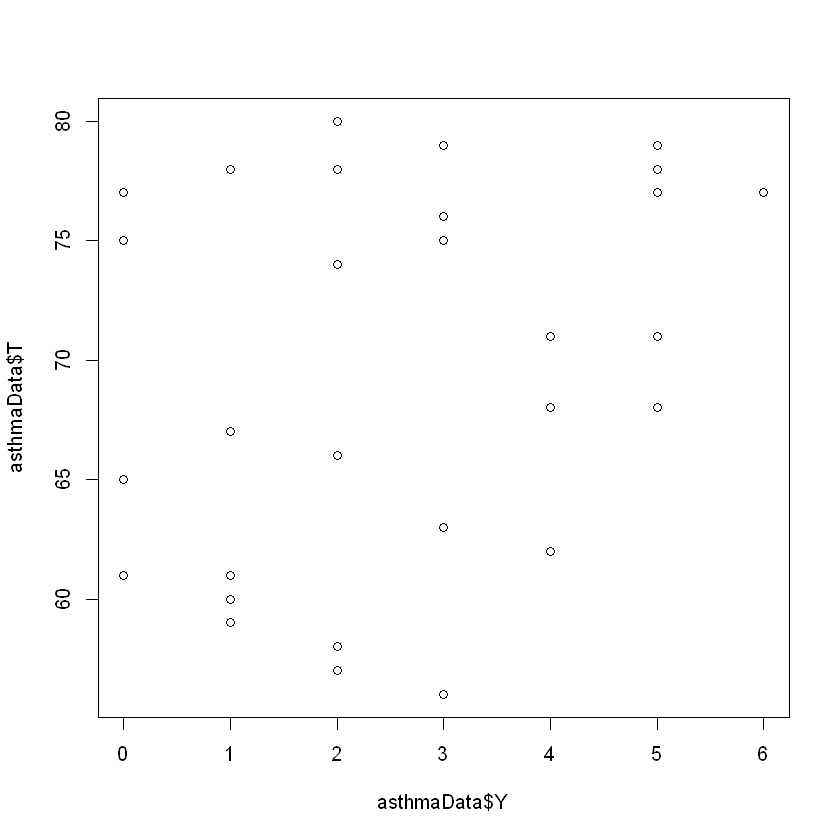

In [3]:
# Calculate the sample correlation coefficient between observed counts Y and temperature T
cor(asthmaData$Y, asthmaData$T)
cor(asthmaData$Y, asthmaData$P)
plot(asthmaData$Y,asthmaData$T)


Call:
lm(formula = Y ~ T, data = asthmaData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0495 -1.1338  0.0171  1.4179  2.9505 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.31333    2.71914  -0.483    0.633
T            0.05666    0.03911   1.449    0.158

Residual standard error: 1.721 on 28 degrees of freedom
Multiple R-squared:  0.06975,	Adjusted R-squared:  0.03652 
F-statistic: 2.099 on 1 and 28 DF,  p-value: 0.1585


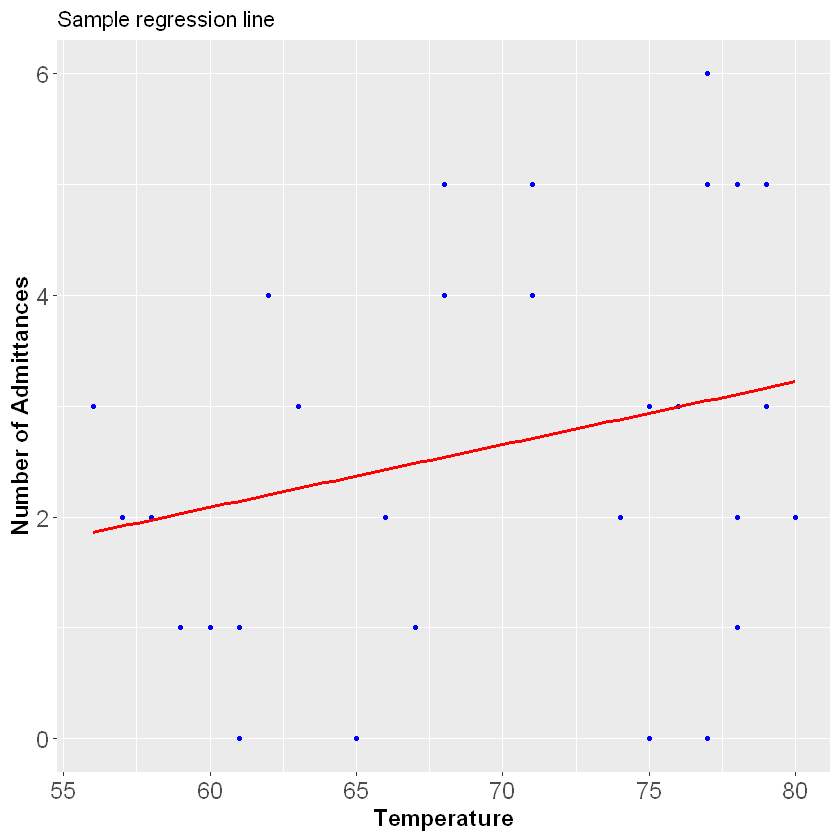

In [4]:
# Fit and plot a simple linear regression model for observed counts Y as a linear
# function of temperature T
model = lm(data = asthmaData, Y ~ T)
summary(model)

ggplot(data = asthmaData, aes(x = T, y = Y)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   labs(x = 'Temperature', y = 'Number of Admittances') + 
   ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

In [5]:
# What is the mean of the observed counts Y
mean(asthmaData$Y)

# What is the mean of the predicted counts Yhat
mean(predict(model))

[1] 2.6

[1] 2.6


Call:
lm(formula = Y ~ P, data = asthmaData)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.61750 -1.33170  0.09611  1.28468  3.14384 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.32639    0.93210    0.35   0.7288  
P            0.04773    0.01858    2.57   0.0158 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.606 on 28 degrees of freedom
Multiple R-squared:  0.1908,	Adjusted R-squared:  0.1619 
F-statistic: 6.603 on 1 and 28 DF,  p-value: 0.0158


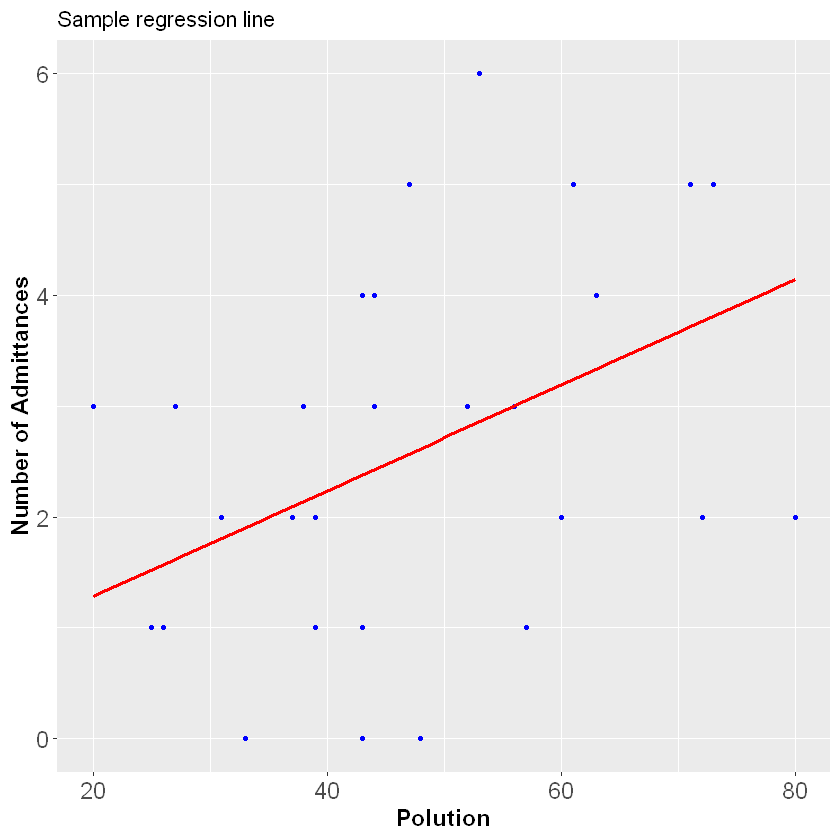

In [6]:
# Fit and plot a simple linear regression model for observed counts Y as a linear
# function of temperature T
model = lm(data = asthmaData, Y ~ P)
summary(model)

ggplot(data = asthmaData, aes(x = P, y = Y)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   labs(x = 'Polution', y = 'Number of Admittances') + 
   ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

In [21]:
# Fit and plot a simple linear regression model for observed counts Y as a linear
# function of temperature T
model = lm(data = asthmaData, Y ~ T+P)
summary(model)

# ggplot(data = asthmaData, aes(x = P, y = Y)) +
#    geom_point(size = 1, color = 'blue') +
#    geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
#    labs(x = 'Polution', y = 'Number of Admittances') + 
#    ggtitle("Sample regression line") +
#    theme(axis.text = element_text(size = 12),
#    axis.text.x = element_text(size = 14),
#    axis.text.y = element_text(size = 14),
#    axis.title = element_text(size = 14, face = "bold"))


Call:
lm(formula = Y ~ T + P, data = asthmaData)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8204 -1.0570  0.2916  1.1167  2.7060 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -3.48541    2.60957  -1.336   0.1928  
T            0.05544    0.03558   1.558   0.1308  
P            0.04736    0.01812   2.614   0.0145 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.566 on 27 degrees of freedom
Multiple R-squared:  0.2576,	Adjusted R-squared:  0.2026 
F-statistic: 4.684 on 2 and 27 DF,  p-value: 0.01793


In [15]:
# What is the mean of the observed counts Y
mean(asthmaData$Y)

# What is the mean of the predicted counts Yhat
mean(predict(model))

[1] 2.6

[1] 2.6

In [16]:
# What is the sum of the residuals?
sum(residuals(model))

[1] -9.853229e-16

In [17]:
# What is the sample correlation between observed counts and residual
cor(asthmaData$Y, residuals(model))

[1] 0.964497

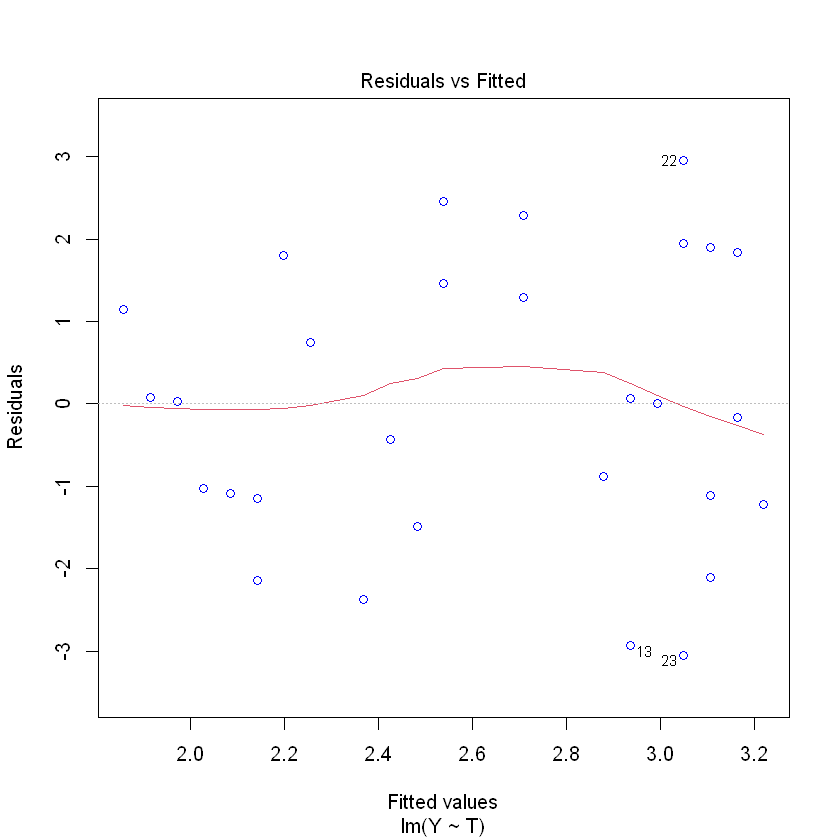

In [18]:
plot(model, which = 1, col = c("blue")) # Residual plot

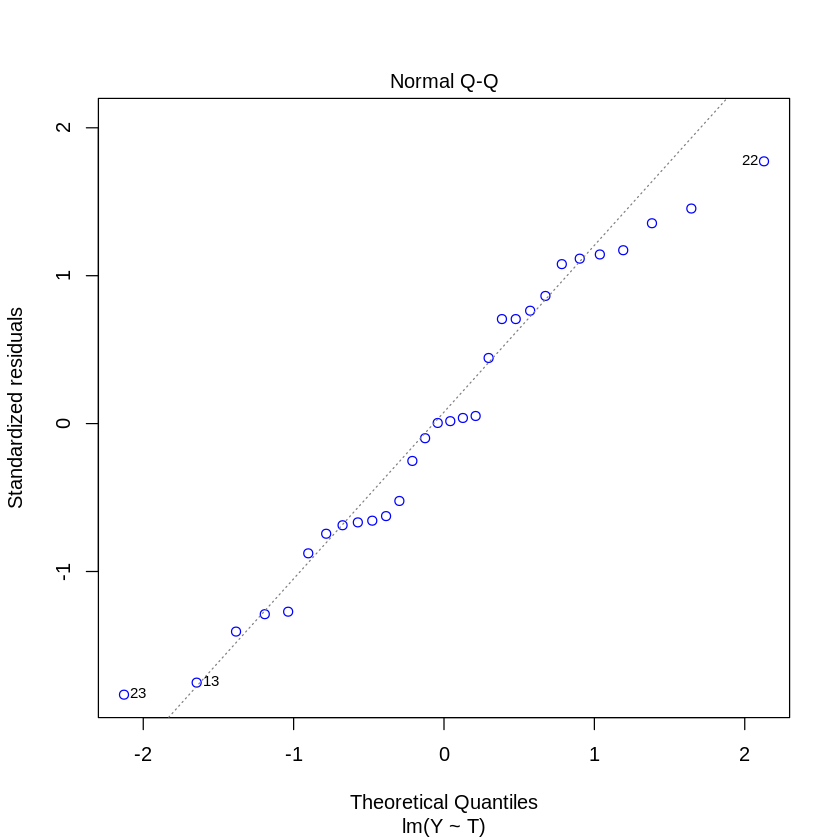

In [ ]:
plot(model, which = 2, col = c("blue")) # QQ (quantile-quantile) plot

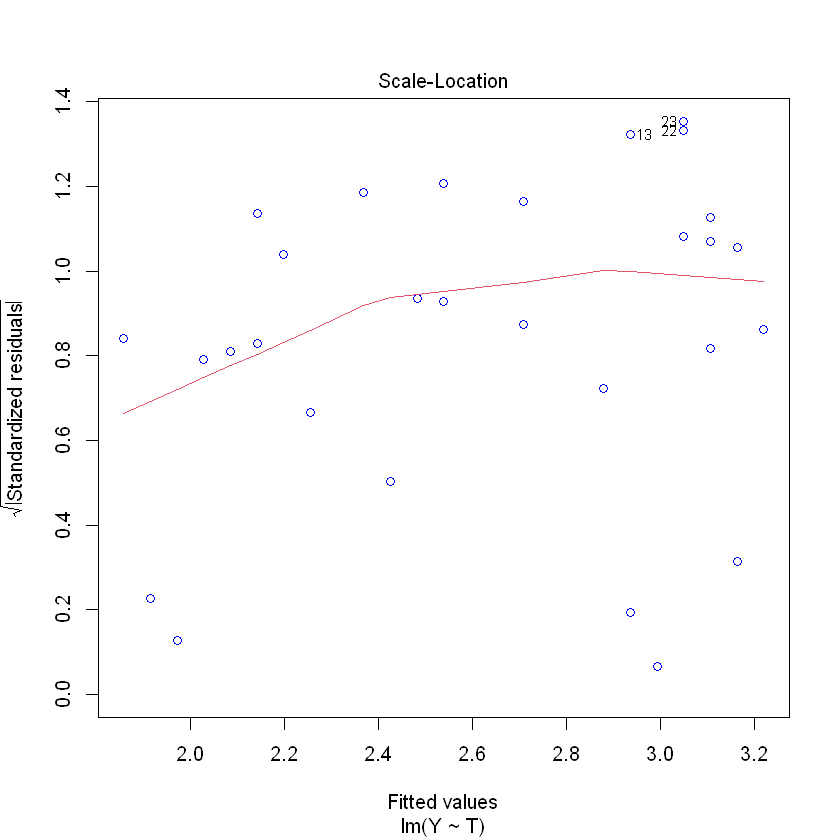

In [19]:
plot(model, which = 3, col = c("blue"))  # Scale-Location Plot


Call:
lm(formula = Y ~ P, data = asthmaData)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.61750 -1.33170  0.09611  1.28468  3.14384 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.32639    0.93210    0.35   0.7288  
P            0.04773    0.01858    2.57   0.0158 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.606 on 28 degrees of freedom
Multiple R-squared:  0.1908,	Adjusted R-squared:  0.1619 
F-statistic: 6.603 on 1 and 28 DF,  p-value: 0.0158


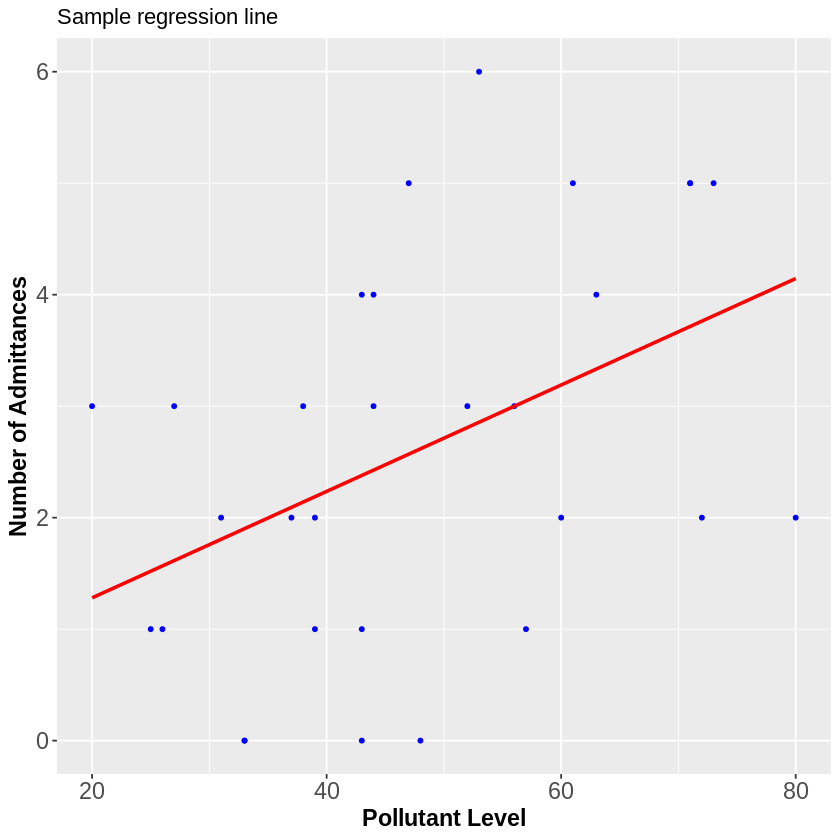

In [ ]:
# Fit and plot a simple linear regression model for observed counts Y as a linear
# function of pollutant level P
model = lm(data = asthmaData, Y ~ P)
summary(model)

ggplot(data = asthmaData, aes(x = P, y = Y)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   labs(x = 'Pollutant Level', y = 'Number of Admittances') + 
   ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

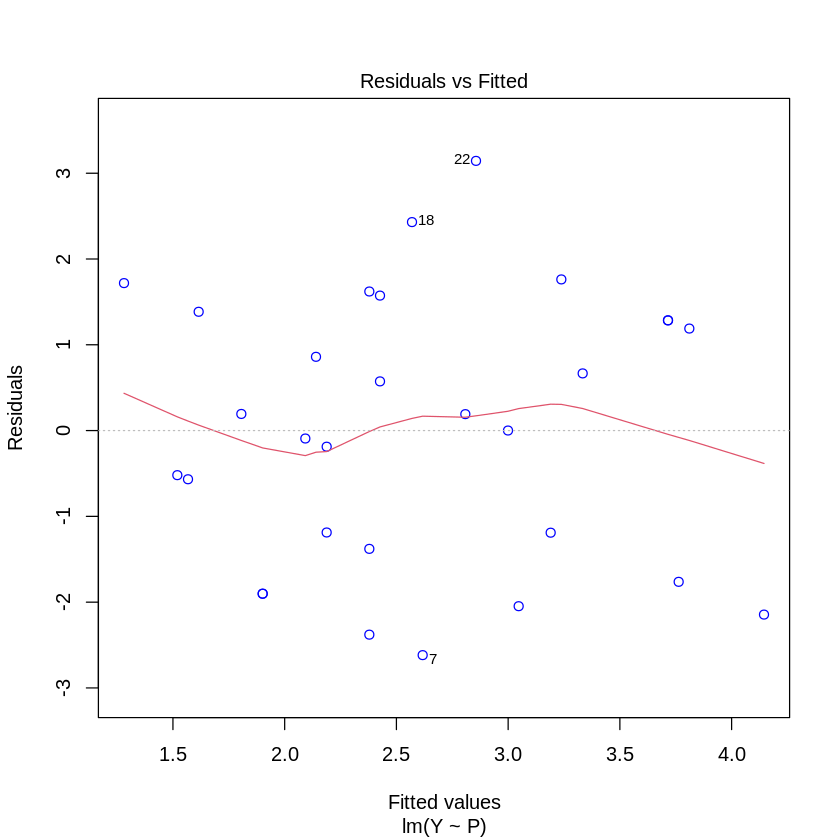

In [ ]:
plot(model, which = 1, col = c("blue")) # Residual plot

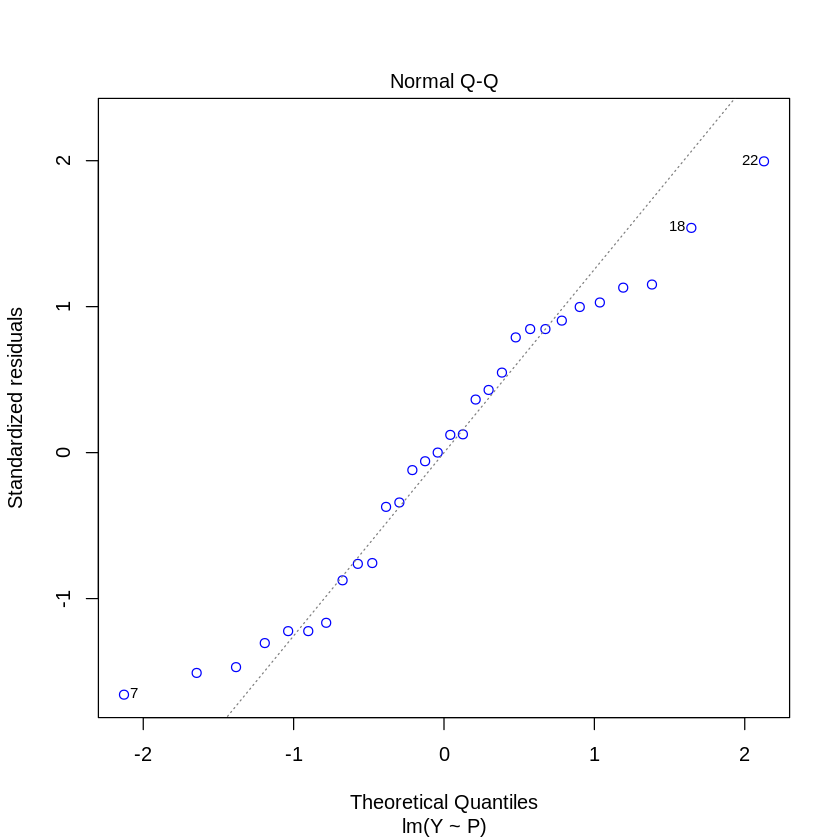

In [ ]:
plot(model, which = 2, col = c("blue")) # QQ (quantile-quantile) plot

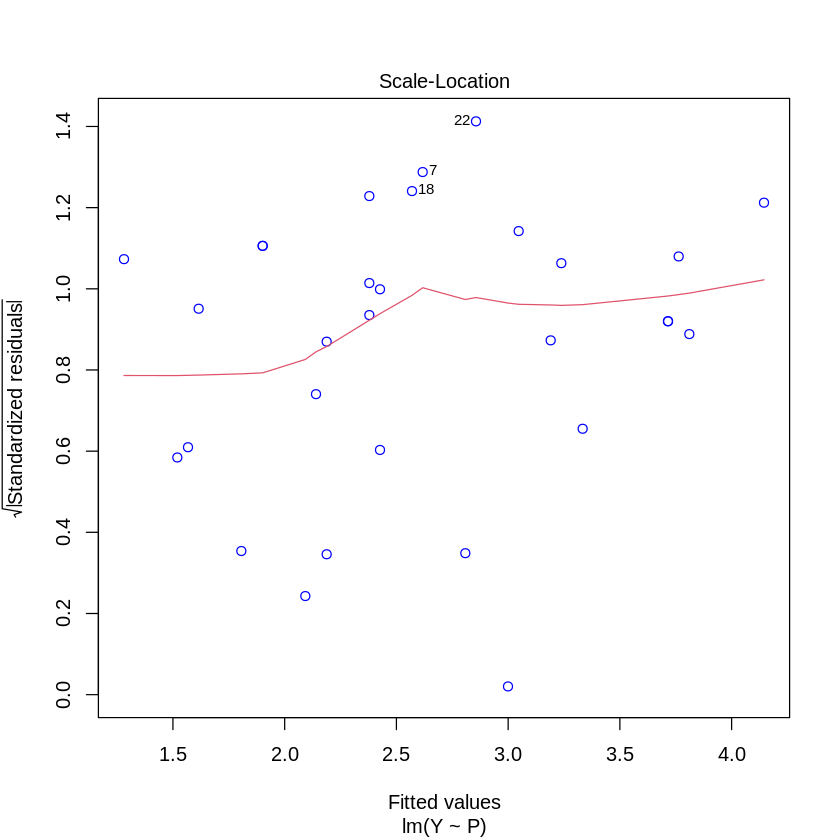

In [ ]:
plot(model, which = 3, col = c("blue"))  # Scale-Location Plot

In [ ]:
# Fit a multiple linear regression model for observed counts Y as a linear
# function of temperature T and pollutant level P
model = lm(data = asthmaData, Y ~ T + P)
summary(model)


Call:
lm(formula = Y ~ T + P, data = asthmaData)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8204 -1.0570  0.2916  1.1167  2.7060 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -3.48541    2.60957  -1.336   0.1928  
T            0.05544    0.03558   1.558   0.1308  
P            0.04736    0.01812   2.614   0.0145 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.566 on 27 degrees of freedom
Multiple R-squared:  0.2576,	Adjusted R-squared:  0.2026 
F-statistic: 4.684 on 2 and 27 DF,  p-value: 0.01793


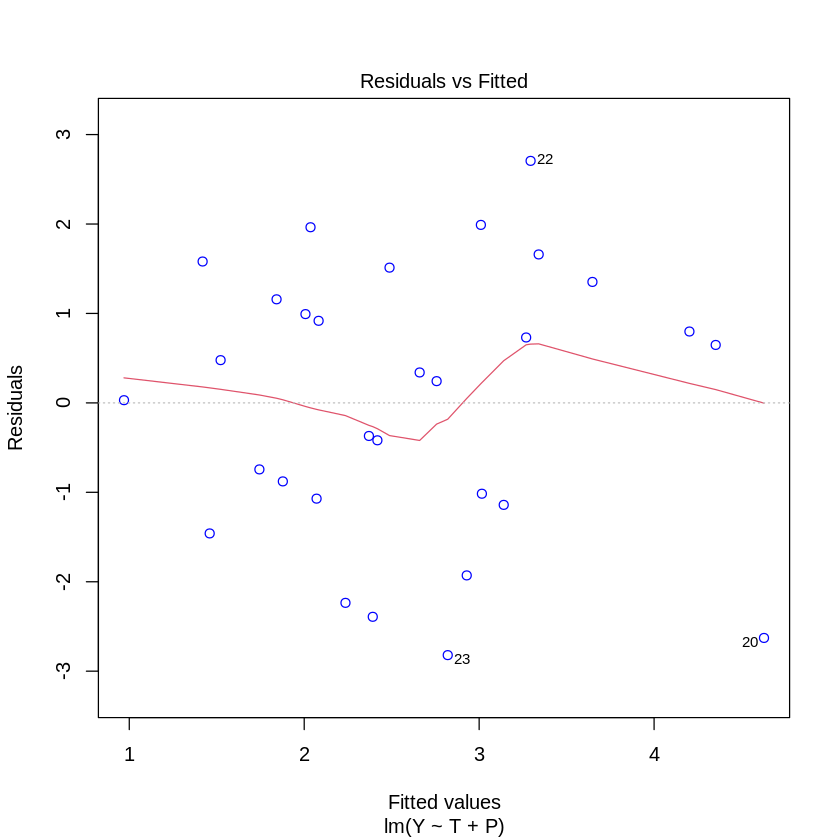

In [ ]:
plot(model, which = 1, col = c("blue")) # Residual plot

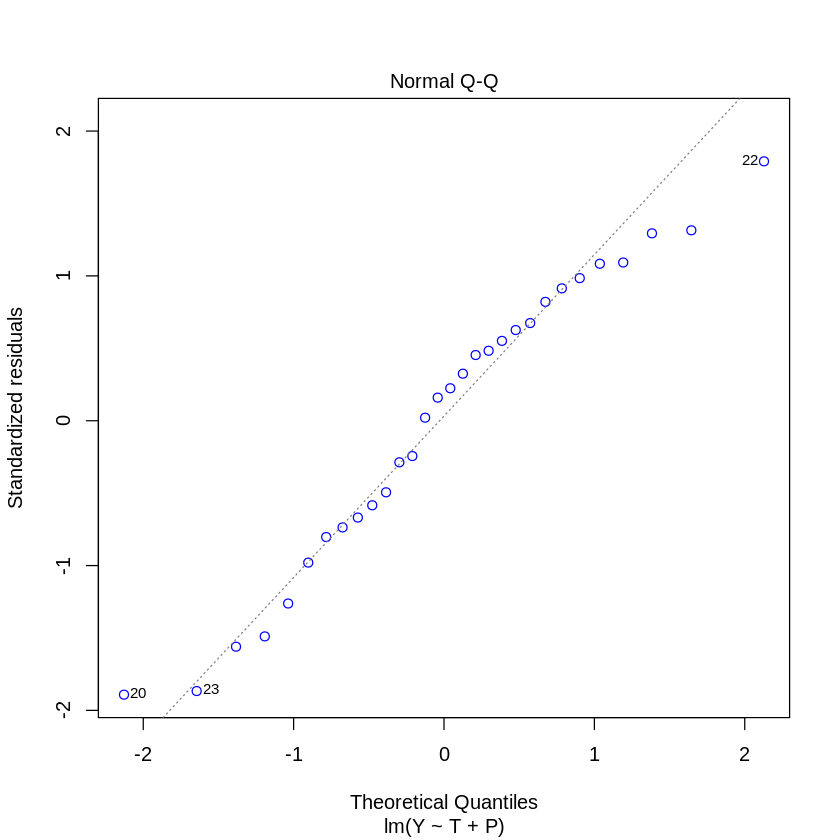

In [ ]:
plot(model, which = 2, col = c("blue")) # QQ (quantile-quantile) plot

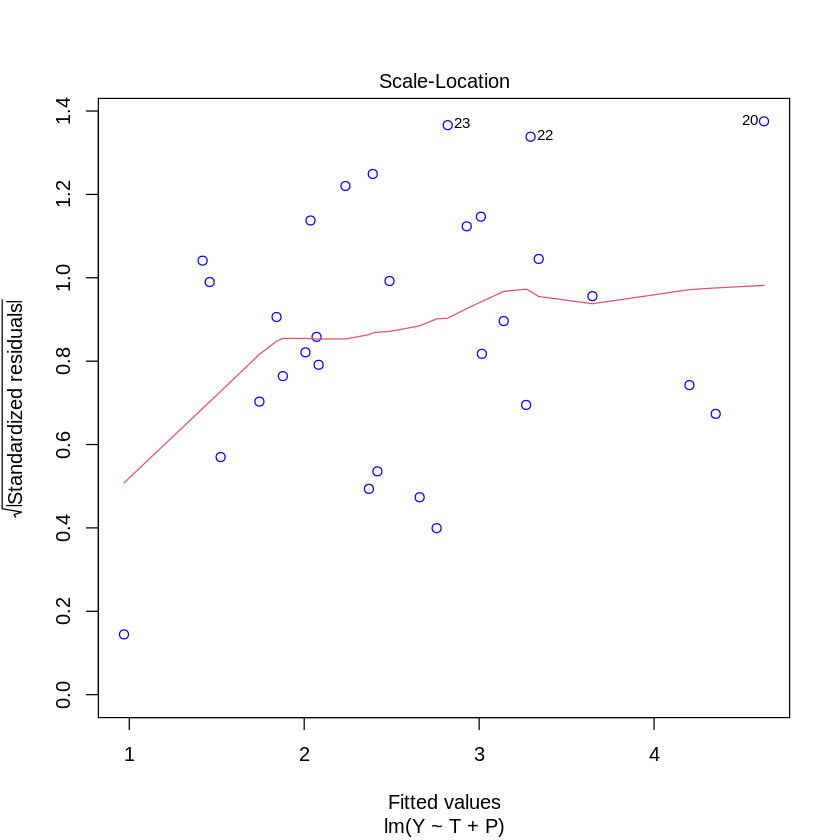

In [ ]:
plot(model, which = 3, col = c("blue"))  # Scale-Location Plot